In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("shark_tank_1 Cleaned 100rows (1).csv")
print(df)




        Startup         Industry        Founder Founder_Gender Education  \
0     Startup_1       Technology           Amit         Female  Commerce   
1     Startup_2       Automobile           Riya           Male  Commerce   
2     Startup_3          Fashion  Pooja & Sanya          Mixed  Commerce   
3     Startup_4  Food & Beverage  Kabir & Tanvi          Mixed  Commerce   
4     Startup_5        Education    Neha & Amit          Mixed  Commerce   
..          ...              ...            ...            ...       ...   
95   Startup_96       Healthcare         Anjali          Mixed  Medicine   
96   Startup_97       Technology         Anjali         Female  Medicine   
97   Startup_98        Education           Amit         Female  Medicine   
98   Startup_99          Fitness         Deepak         Female  Medicine   
99  Startup_100       Technology          Arjun          Mixed  Medicine   

    Previous_Startup_Exp  Ask_Amount(USD)  Deal_Amount(USD)  Equity_Asked(%)  \
0      

In [8]:
# Add Deal_Status column
df["Deal_Status"] = df["Deal_Amount(USD)"].apply(lambda x: "Accepted" if x > 0 else "Rejected")

In [9]:
# Industry-wise Investment
industry_invest = df.groupby("Industry")["Deal_Amount(USD)"].sum().sort_values(ascending=False)
print("Industry-wise Total Investment:\n", industry_invest)

Industry-wise Total Investment:
 Industry
Automobile         4544757
Technology         3831109
Sustainability     3194298
Fashion            2994971
Education          2994443
Fitness            2673201
Healthcare         2292277
Food & Beverage    1179380
Name: Deal_Amount(USD), dtype: int64


In [10]:
# Gender-wise Success
gender_success = df.groupby("Founder_Gender")["Deal_Status"].value_counts(normalize=True).unstack().fillna(0)
print("\nGender-wise Success Rate:\n", gender_success)


Gender-wise Success Rate:
 Deal_Status     Accepted
Founder_Gender          
Female               1.0
Male                 1.0
Mixed                1.0


In [11]:
# Education-wise Success
edu_success = df.groupby("Education")["Deal_Status"].value_counts(normalize=True).unstack().fillna(0)
print("\nEducation-wise Success Rate:\n", edu_success)



Education-wise Success Rate:
 Deal_Status  Accepted
Education            
Commerce          1.0
Design            1.0
Engineering       1.0
MBA               1.0
Medicine          1.0


In [12]:
# Previous Startup Experience
exp_success = df.groupby("Previous_Startup_Exp")["Deal_Status"].value_counts(normalize=True).unstack().fillna(0)
print("\nStartup Experience vs Success:\n", exp_success)



Startup Experience vs Success:
 Deal_Status           Accepted
Previous_Startup_Exp          
0                          1.0
1                          1.0


In [13]:
# Investor Preferences
investor_industry = df.groupby(["Investor", "Industry"])["Deal_Amount(USD)"].sum().unstack().fillna(0)
print("\nInvestor Preferences (Deal Amount):\n", investor_industry)



Investor Preferences (Deal Amount):
 Industry  Automobile  Education    Fashion   Fitness  Food & Beverage  \
Investor                                                                
Aman        674089.0   115234.0    38075.0  708514.0              0.0   
Anupam      481790.0   243119.0   215859.0   75858.0          27784.0   
Ashneer     433597.0   469821.0        0.0  398650.0         148090.0   
Mark             0.0   365267.0   743136.0  220816.0              0.0   
Namita      798295.0   317566.0  1205537.0  863768.0         159605.0   
No Deal     501273.0   703038.0        0.0  405595.0         680781.0   
Peyush     1312466.0   780398.0   334635.0       0.0              0.0   
Vineeta     343247.0        0.0   457729.0       0.0         163120.0   

Industry  Healthcare  Sustainability  Technology  
Investor                                          
Aman        220414.0        537600.0         0.0  
Anupam       22368.0        402378.0    381707.0  
Ashneer     516764.0       

In [14]:
# Equity Comparison
equity_by_industry = df.groupby("Industry")[["Equity_Asked(%)","Equity_Given(%)"]].mean()
print("\nAverage Equity Asked vs Given (by Industry):\n", equity_by_industry)


Average Equity Asked vs Given (by Industry):
                  Equity_Asked(%)  Equity_Given(%)
Industry                                         
Automobile             13.142857        13.142857
Education              12.062500        12.062500
Fashion                 9.833333         9.833333
Fitness                11.545455        11.545455
Food & Beverage        13.857143        13.857143
Healthcare             11.916667        11.916667
Sustainability         13.333333        13.333333
Technology             10.812500        10.812500


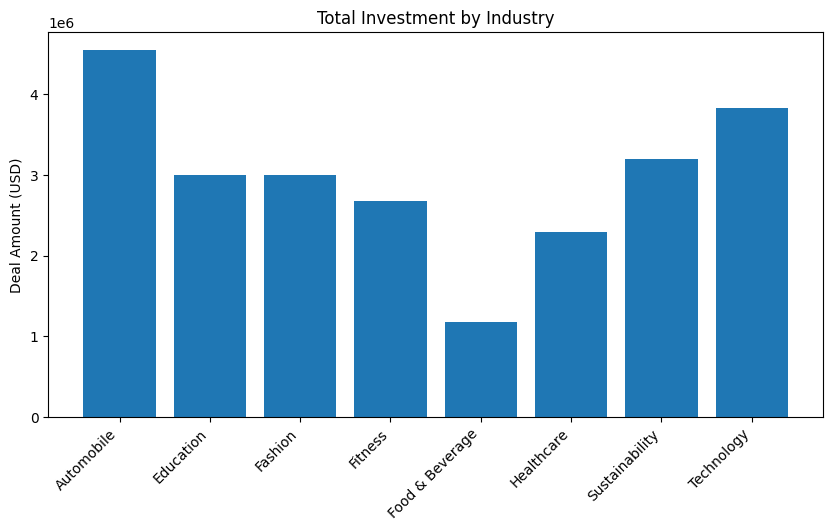

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# Data load 
df = pd.read_csv("shark_tank_1 Cleaned 100rows (1).csv")

# Industry-wise total investment
industry_invest = df.groupby("Industry")["Deal_Amount(USD)"].sum()

# plot
plt.figure(figsize=(10,5))
plt.bar(industry_invest.index,industry_invest.values)
plt.xticks(rotation=45, ha="right")
plt.title("Total Investment by Industry")
plt.ylabel("Deal Amount (USD)")
plt.show()


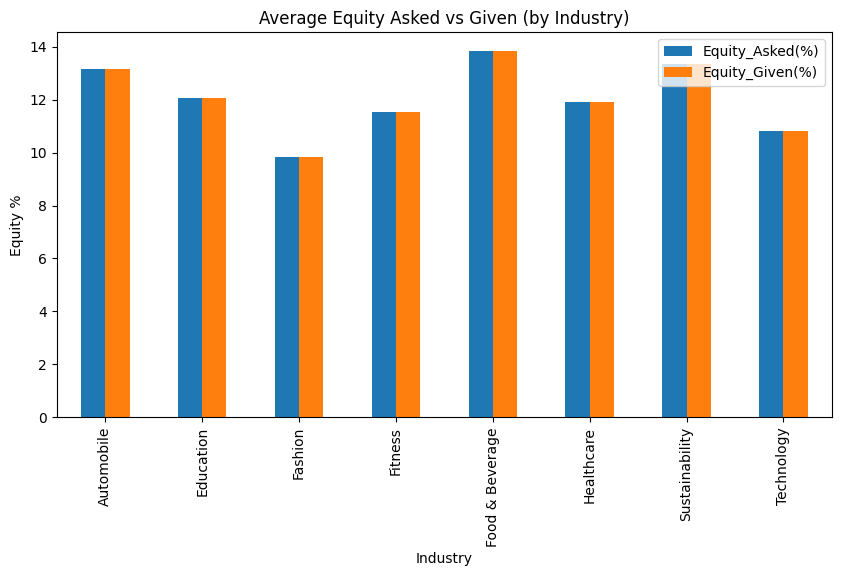

In [18]:
# Equity Comparison
equity_by_industry.plot(kind="bar", figsize=(10,5))
plt.title("Average Equity Asked vs Given (by Industry)")
plt.ylabel("Equity %")
plt.show()

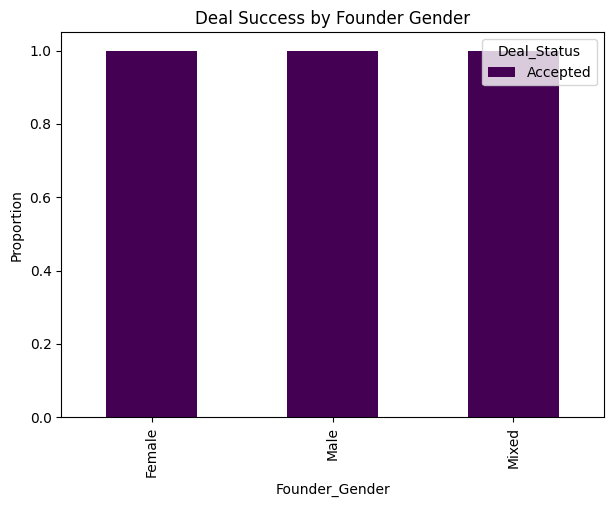

In [19]:
import seaborn as sns

# Gender-wise Success
gender_success.plot(kind="bar", stacked=True, figsize=(7,5), colormap="viridis")
plt.title("Deal Success by Founder Gender")
plt.ylabel("Proportion")
plt.show()



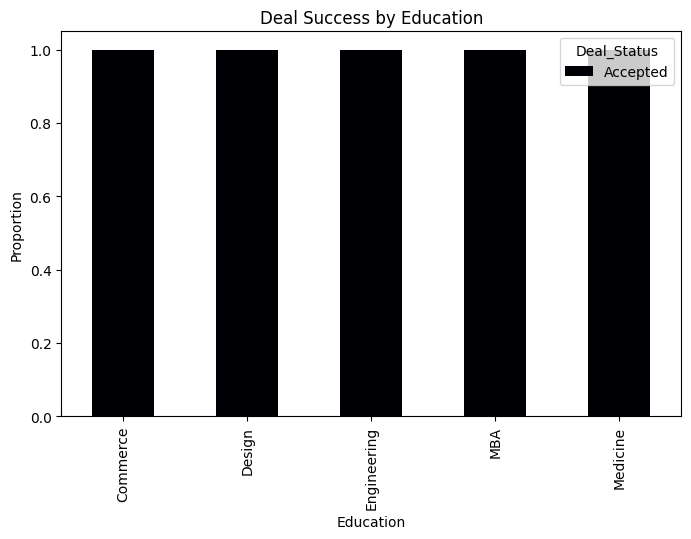

In [20]:
# Education-wise Success
edu_success.plot(kind="bar", stacked=True, figsize=(8,5), colormap="magma")
plt.title("Deal Success by Education")
plt.ylabel("Proportion")
plt.show()


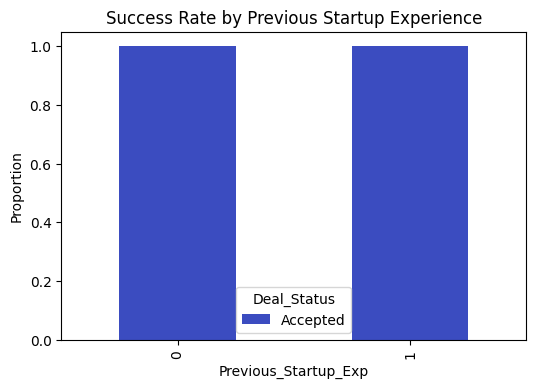

In [21]:
# Experience vs Success
exp_success.plot(kind="bar", stacked=True, figsize=(6,4), colormap="coolwarm")
plt.title("Success Rate by Previous Startup Experience")
plt.ylabel("Proportion")
plt.show()


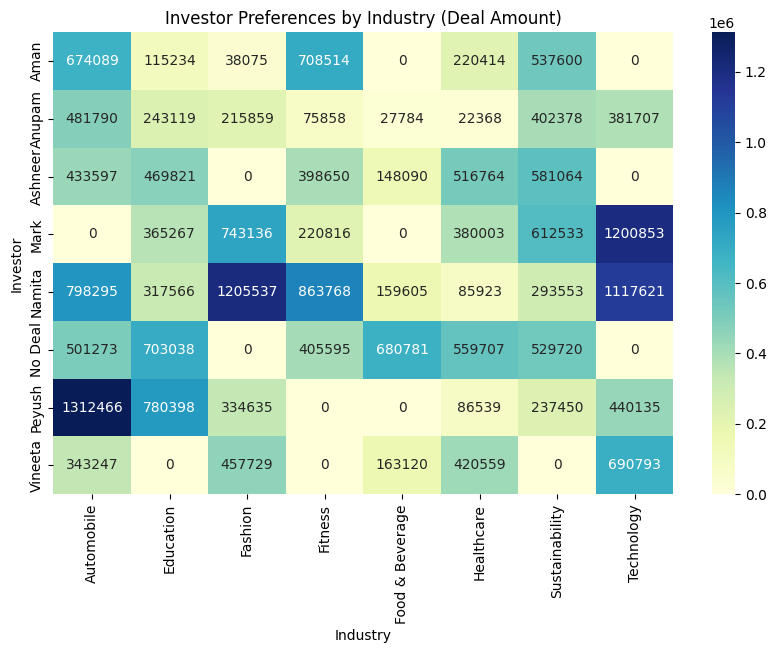

In [22]:
# Investor Preferences Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(investor_industry, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Investor Preferences by Industry (Deal Amount)")
plt.show()

In [ ]:
# Cleaned dataset save 
df.to_csv("shark_tank_cleaned_final.csv", index=False)

# industry-wise aggregation save 
industry_invest.to_csv("industry_investment_summary.csv")
